# Chapter 2 線形関数

## 2.1 線形関数

### Juliaの関数

Juliaには関数を定義する方法がいくつかある．簡単な数式で表される$f(x)=x_1+x_2-x_4^2$のような関数は一行で定義できる．

In [1]:
f(x) = x[1] + x[2] - x[4]^2

f (generic function with 1 method)

In [2]:
f([-1, 0, 1, 2])

-5

この関数の定義では，引数`x`の1番目・2番目・4番目の要素を使うため，`f(x)`を呼び出す（評価する）前に`x`を定義しておく必要がある．`x`が3次元ベクトルやスカラの場合にはエラーになる．


### 重ね合わせ

$a$を$n$次元ベクトルとする．関数$f(x)=a^T x$は線形である．つまり，任意の$n$次元ベクトル$x, y$と任意のスカラ$\alpha, \beta$に対して，次式の重ね合わせの性質が成り立つ．
$$
f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)
$$
この重ね合わせの性質が意味するのは，2つのベクトルの線形結合を関数$f$に適用したものは，2つのベクトルを関数$f$に適用して線形結合したものと同じ，ということである．

では，ベクトル$a$との内積を計算する関数$f$を定義して，$x, y, \alpha, \beta$を与えてJuliaで線形性を確認してみよう（この方法は関数が線形であるかどうかをチェックするものではない．単にある特定の値に対してだけ線形性が成り立つかどうかをチェックしているだけである）．

In [3]:
a = [-2, 0, 1, -3];

In [4]:
f(x) = a' * x  # 内積を計算する関数

f (generic function with 1 method)

In [6]:
x = [2, 2, -1, 1];
y = [0, 1, -1, 0];
alpha = 1.5;
beta = -3.7;

In [7]:
lhs = f(alpha * x + beta * y)

-8.3

In [8]:
rhs = alpha * f(x) + beta * f(y)

-8.3

この関数$f(x) = a^T x$の定義から，$f(e_3)=a_3$である．この等式をチェックしよう．

In [7]:
e3 = [0, 0, 1, 0];
f(e3)

1

### 例

Juliaで平均を計算する関数を定義して，確認してみよう（ただしJuliaの`Statistics`パッケージには`mean`という関数がある）．

In [8]:
avg(x) = (ones(length(x)) / length(x))' * x;
x = [1, -3, 2, -1];
avg(x)

-0.25

平均の関数はもっと簡潔に`sum(x)/length(x)`で定義できる．この`ave`関数は`VMLS`パッケージに含まれているので，このパッケージをインストールすれば`ave`関数が使える．


## 2.2 テーラー展開


### テーラー展開

関数$f: \boldsymbol{R}^N \to \boldsymbol{R}$の
$z$における
（1次）テーラー展開は，以下の$x$についてのアフィン関数である．
$$
\hat{f}(x) = f(z) + \nabla f(z)^T (x-z)
$$
$x$が$z$に近ければ，$\hat{f}(x)$も$f(x)$に非常に近い．Juliaで数値例を見てみよう（ページ＊＊参照）．

In [10]:
f(x) = x[1] + exp(x[2] - x[1]);  # 関数
grad_f(z) = [1 - exp(z[2] - z[1]), exp(z[2] - z[1])];  # その微分
z = [1, 2];
# zでのテーラー近似
f_hat(x) = f(z) + grad_f(z)' * (x - z);
# 特定のxについてfとf_hatを計算
f([1, 2]),  f_hat([1, 2])

(3.718281828459045, 3.718281828459045)

In [11]:
f([0.96,1.98]),  f_hat([0.96,1.98])

(3.733194763964298, 3.732647465028226)

In [12]:
f([1.10,2.11]),  f_hat([1.10,2.11])

(3.845601015016916, 3.845464646743635)

## 2.3 回帰モデル

### 回帰モデル

回帰モデルは$f(x) = x^T \beta + v$という形の$x$についてのアフィン関数である．ここで$n$次元ベクトル$\beta$とスカラ$v$はこのモデルのパラメータである．この回帰モデルを使って，入力$x$に対する$y$の真値や観測値を推測（近似）する（後ほど，与えられたデータに対して回帰モデルのパラメータを推定する方法を説明する）．

それでは本書ページ＊＊の家の売却価格についての回帰モデルを定義して，その予測と実際の価格$y$とを，いくつかの$x$について比較してみよう．

In [13]:
# 回帰モデルのパラメータ
beta = [148.73, -18.85];
v = 54.40;  
y_hat(x) = x' * beta + v;
# 回帰モデルによる予測
x = [0.846, 1];
y = 115;
y_hat(x), y

(161.37557999999999, 115)

In [14]:
x = [1.324, 2];
y = 234.50;
y_hat(x), y

(213.61852000000002, 234.5)

1つ目の予測は全くダメである．2つ目のほうがよい．

家の売却価格の予測値と真値の散布図（本書の図2.4）を以下で生成する．ここで`VMLS`パッケージの関数`house_sales_data`を使って，ベクトル`price, area, beds`を取得している（付録A参照）．

In [15]:
using VMLS

In [16]:
D = house_sales_data();

In [17]:
price = D["price"]

774-element Array{Float64,1}:
  94.905
  98.937
 100.309
 106.25 
 107.502
 108.75 
 110.7  
 113.263
 116.25 
 120.0  
 121.63 
 122.0  
 122.682
   ⋮    
 224.252
 225.0  
 228.0  
 229.027
 229.5  
 230.0  
 230.0  
 232.425
 234.0  
 235.0  
 235.301
 235.738

In [18]:
area = D["area"]

774-element Array{Float64,1}:
 0.941
 1.146
 0.909
 1.289
 1.02 
 1.022
 1.134
 0.844
 0.795
 0.588
 1.356
 1.118
 1.329
 ⋮    
 0.96 
 1.456
 1.45 
 1.358
 1.329
 1.715
 1.262
 2.28 
 1.477
 1.216
 1.685
 1.362

In [19]:
beds = D["beds"]

774-element Array{Int64,1}:
 2
 3
 3
 3
 3
 2
 2
 2
 2
 2
 3
 3
 4
 ⋮
 3
 3
 3
 3
 4
 4
 3
 4
 3
 3
 4
 3

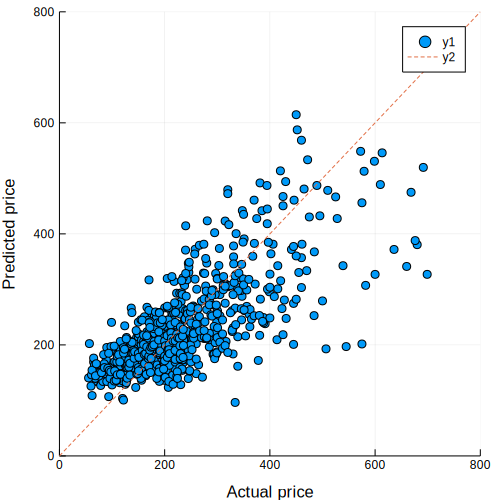

In [22]:
v = 54.4017;
beta = [ 147.7251, -18.8534 ]
predicted = v .+ beta[1] * area + beta[2] * beds;
using Plots
scatter(price, predicted, lims = (0,800))
plot!([0, 800], [0, 800], linestyle = :dash);
# プロットの軸を調整，ラベルを追加
plot!(xlims = (0,800), ylims = (0,800), size = (500,500))
plot!(xlabel = "Actual price", ylabel = "Predicted price")

![図2.1](fig2-1.pdf)

図2.1 15日間にサクラメントで販売された774件分の
家の売却の価格の予測値と真値の散布図